In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 5

setup_random_seed(RANDOM_SEED)

In [2]:
df = pd.read_csv('data/01_raw/CatData/pak-wheels/PakWheelsDataSet.csv', index_col=0)

In [3]:
# analysis = sweetviz.analyze(df)
# analysis.show_notebook()

In [4]:
x = df.drop(columns = ['Name', 'Price'])
y = np.log10(df[['Price']])

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=42)

In [6]:
x_train.shape, x_test.shape

((61352, 7), (15338, 7))

In [7]:
x.columns

Index(['Make', 'Transmission', 'Engine Type', 'Engine Capacity(CC)',
       'Mileage(kms)', 'City', 'Year'],
      dtype='object')

In [8]:
model = catboost.CatBoostRegressor(
    cat_features=['Make', 'Transmission', 'Engine Type', 'City'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000,
    random_state=RANDOM_SEED
)

In [9]:
%time model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.2642201	test: 0.2554129	best: 0.2554129 (0)	total: 102ms	remaining: 3m 23s
1:	learn: 0.2190374	test: 0.2122238	best: 0.2122238 (1)	total: 113ms	remaining: 1m 53s
2:	learn: 0.1836126	test: 0.1777690	best: 0.1777690 (2)	total: 121ms	remaining: 1m 20s
3:	learn: 0.1539971	test: 0.1486995	best: 0.1486995 (3)	total: 131ms	remaining: 1m 5s
4:	learn: 0.1266005	test: 0.1215709	best: 0.1215709 (4)	total: 140ms	remaining: 55.7s
5:	learn: 0.1025298	test: 0.0978055	best: 0.0978055 (5)	total: 150ms	remaining: 49.8s
6:	learn: 0.0789534	test: 0.0743807	best: 0.0743807 (6)	total: 158ms	remaining: 45.1s
7:	learn: 0.0555157	test: 0.0512054	best: 0.0512054 (7)	total: 167ms	remaining: 41.6s
8:	learn: 0.0325224	test: 0.0283644	best: 0.0283644 (8)	total: 175ms	remaining: 38.7s
9:	learn: 0.0105054	test: 0.0063839	best: 0.0063839 (9)	total: 185ms	remaining: 36.7s
10:	learn: -0.0101789	test: -0.0142646	best: -0.0142646 (10)	total: 193ms	remaining: 34.9s
11:	learn: -0.0310053	test: -0.0350014	best: -

91:	learn: -0.9701848	test: -0.9722762	best: -0.9722762 (91)	total: 923ms	remaining: 19.1s
92:	learn: -0.9779891	test: -0.9800052	best: -0.9800052 (92)	total: 932ms	remaining: 19.1s
93:	learn: -0.9834973	test: -0.9852811	best: -0.9852811 (93)	total: 942ms	remaining: 19.1s
94:	learn: -0.9893143	test: -0.9914451	best: -0.9914451 (94)	total: 952ms	remaining: 19.1s
95:	learn: -0.9955822	test: -0.9975560	best: -0.9975560 (95)	total: 959ms	remaining: 19s
96:	learn: -0.9991487	test: -1.0011455	best: -1.0011455 (96)	total: 968ms	remaining: 19s
97:	learn: -1.0040192	test: -1.0061286	best: -1.0061286 (97)	total: 979ms	remaining: 19s
98:	learn: -1.0077194	test: -1.0096811	best: -1.0096811 (98)	total: 988ms	remaining: 19s
99:	learn: -1.0129365	test: -1.0150974	best: -1.0150974 (99)	total: 998ms	remaining: 19s
100:	learn: -1.0179300	test: -1.0201152	best: -1.0201152 (100)	total: 1s	remaining: 18.9s
101:	learn: -1.0232248	test: -1.0249141	best: -1.0249141 (101)	total: 1.01s	remaining: 18.9s
102:	lea

200:	learn: -1.2138388	test: -1.2061490	best: -1.2061490 (200)	total: 1.94s	remaining: 17.4s
201:	learn: -1.2142664	test: -1.2063015	best: -1.2063015 (201)	total: 1.95s	remaining: 17.4s
202:	learn: -1.2151232	test: -1.2069383	best: -1.2069383 (202)	total: 1.96s	remaining: 17.3s
203:	learn: -1.2156511	test: -1.2072635	best: -1.2072635 (203)	total: 1.97s	remaining: 17.3s
204:	learn: -1.2160607	test: -1.2075271	best: -1.2075271 (204)	total: 1.98s	remaining: 17.3s
205:	learn: -1.2164106	test: -1.2077664	best: -1.2077664 (205)	total: 1.99s	remaining: 17.3s
206:	learn: -1.2165942	test: -1.2078717	best: -1.2078717 (206)	total: 1.99s	remaining: 17.2s
207:	learn: -1.2178421	test: -1.2090003	best: -1.2090003 (207)	total: 2s	remaining: 17.2s
208:	learn: -1.2185676	test: -1.2095166	best: -1.2095166 (208)	total: 2.01s	remaining: 17.2s
209:	learn: -1.2203077	test: -1.2116381	best: -1.2116381 (209)	total: 2.02s	remaining: 17.2s
210:	learn: -1.2211166	test: -1.2122355	best: -1.2122355 (210)	total: 2.0

292:	learn: -1.2932954	test: -1.2780493	best: -1.2780493 (292)	total: 2.76s	remaining: 16.1s
293:	learn: -1.2945876	test: -1.2790677	best: -1.2790677 (293)	total: 2.77s	remaining: 16.1s
294:	learn: -1.2951796	test: -1.2797013	best: -1.2797013 (294)	total: 2.78s	remaining: 16.1s
295:	learn: -1.2958749	test: -1.2803739	best: -1.2803739 (295)	total: 2.79s	remaining: 16.1s
296:	learn: -1.2972147	test: -1.2815108	best: -1.2815108 (296)	total: 2.8s	remaining: 16.1s
297:	learn: -1.2981776	test: -1.2824048	best: -1.2824048 (297)	total: 2.81s	remaining: 16s
298:	learn: -1.2990736	test: -1.2833266	best: -1.2833266 (298)	total: 2.81s	remaining: 16s
299:	learn: -1.2999584	test: -1.2842973	best: -1.2842973 (299)	total: 2.82s	remaining: 16s
300:	learn: -1.3008123	test: -1.2848622	best: -1.2848622 (300)	total: 2.83s	remaining: 16s
301:	learn: -1.3014712	test: -1.2854926	best: -1.2854926 (301)	total: 2.84s	remaining: 16s
302:	learn: -1.3024667	test: -1.2865310	best: -1.2865310 (302)	total: 2.85s	remai

381:	learn: -1.3503587	test: -1.3265333	best: -1.3265333 (381)	total: 3.58s	remaining: 15.2s
382:	learn: -1.3508546	test: -1.3269507	best: -1.3269507 (382)	total: 3.59s	remaining: 15.2s
383:	learn: -1.3512525	test: -1.3272041	best: -1.3272041 (383)	total: 3.6s	remaining: 15.2s
384:	learn: -1.3522404	test: -1.3280941	best: -1.3280941 (384)	total: 3.61s	remaining: 15.1s
385:	learn: -1.3528598	test: -1.3287128	best: -1.3287128 (385)	total: 3.62s	remaining: 15.1s
386:	learn: -1.3532540	test: -1.3290126	best: -1.3290126 (386)	total: 3.63s	remaining: 15.1s
387:	learn: -1.3539567	test: -1.3297615	best: -1.3297615 (387)	total: 3.64s	remaining: 15.1s
388:	learn: -1.3545969	test: -1.3303906	best: -1.3303906 (388)	total: 3.65s	remaining: 15.1s
389:	learn: -1.3553038	test: -1.3309713	best: -1.3309713 (389)	total: 3.66s	remaining: 15.1s
390:	learn: -1.3562680	test: -1.3319295	best: -1.3319295 (390)	total: 3.67s	remaining: 15.1s
391:	learn: -1.3572259	test: -1.3327674	best: -1.3327674 (391)	total: 3

485:	learn: -1.4023820	test: -1.3695036	best: -1.3695036 (485)	total: 4.6s	remaining: 14.3s
486:	learn: -1.4026317	test: -1.3696460	best: -1.3696460 (486)	total: 4.61s	remaining: 14.3s
487:	learn: -1.4030047	test: -1.3698915	best: -1.3698915 (487)	total: 4.62s	remaining: 14.3s
488:	learn: -1.4033792	test: -1.3702076	best: -1.3702076 (488)	total: 4.63s	remaining: 14.3s
489:	learn: -1.4036136	test: -1.3703045	best: -1.3703045 (489)	total: 4.64s	remaining: 14.3s
490:	learn: -1.4039234	test: -1.3705406	best: -1.3705406 (490)	total: 4.65s	remaining: 14.3s
491:	learn: -1.4041752	test: -1.3707409	best: -1.3707409 (491)	total: 4.66s	remaining: 14.3s
492:	learn: -1.4049890	test: -1.3714383	best: -1.3714383 (492)	total: 4.67s	remaining: 14.3s
493:	learn: -1.4051745	test: -1.3715123	best: -1.3715123 (493)	total: 4.67s	remaining: 14.2s
494:	learn: -1.4055955	test: -1.3718205	best: -1.3718205 (494)	total: 4.68s	remaining: 14.2s
495:	learn: -1.4058400	test: -1.3720586	best: -1.3720586 (495)	total: 4

595:	learn: -1.4407618	test: -1.4005260	best: -1.4005260 (595)	total: 5.62s	remaining: 13.2s
596:	learn: -1.4410545	test: -1.4007013	best: -1.4007013 (596)	total: 5.63s	remaining: 13.2s
597:	learn: -1.4412036	test: -1.4007988	best: -1.4007988 (597)	total: 5.63s	remaining: 13.2s
598:	learn: -1.4413869	test: -1.4007984	best: -1.4007988 (597)	total: 5.64s	remaining: 13.2s
599:	learn: -1.4414976	test: -1.4008461	best: -1.4008461 (599)	total: 5.65s	remaining: 13.2s
600:	learn: -1.4416626	test: -1.4009587	best: -1.4009587 (600)	total: 5.66s	remaining: 13.2s
601:	learn: -1.4418635	test: -1.4010613	best: -1.4010613 (601)	total: 5.67s	remaining: 13.2s
602:	learn: -1.4421552	test: -1.4012174	best: -1.4012174 (602)	total: 5.68s	remaining: 13.2s
603:	learn: -1.4423190	test: -1.4012831	best: -1.4012831 (603)	total: 5.68s	remaining: 13.1s
604:	learn: -1.4424548	test: -1.4013218	best: -1.4013218 (604)	total: 5.69s	remaining: 13.1s
605:	learn: -1.4425568	test: -1.4013537	best: -1.4013537 (605)	total: 

688:	learn: -1.4539277	test: -1.4078724	best: -1.4078724 (688)	total: 6.44s	remaining: 12.3s
689:	learn: -1.4540385	test: -1.4079277	best: -1.4079277 (689)	total: 6.45s	remaining: 12.2s
690:	learn: -1.4541174	test: -1.4079186	best: -1.4079277 (689)	total: 6.46s	remaining: 12.2s
691:	learn: -1.4542962	test: -1.4080094	best: -1.4080094 (691)	total: 6.46s	remaining: 12.2s
692:	learn: -1.4544195	test: -1.4080738	best: -1.4080738 (692)	total: 6.47s	remaining: 12.2s
693:	learn: -1.4544724	test: -1.4080282	best: -1.4080738 (692)	total: 6.49s	remaining: 12.2s
694:	learn: -1.4545591	test: -1.4080587	best: -1.4080738 (692)	total: 6.5s	remaining: 12.2s
695:	learn: -1.4546642	test: -1.4081365	best: -1.4081365 (695)	total: 6.5s	remaining: 12.2s
696:	learn: -1.4550479	test: -1.4083360	best: -1.4083360 (696)	total: 6.51s	remaining: 12.2s
697:	learn: -1.4554191	test: -1.4085621	best: -1.4085621 (697)	total: 6.52s	remaining: 12.2s
698:	learn: -1.4554685	test: -1.4085479	best: -1.4085621 (697)	total: 6.

800:	learn: -1.4702066	test: -1.4162411	best: -1.4162411 (800)	total: 7.46s	remaining: 11.2s
801:	learn: -1.4702399	test: -1.4161948	best: -1.4162411 (800)	total: 7.46s	remaining: 11.2s
802:	learn: -1.4704836	test: -1.4163420	best: -1.4163420 (802)	total: 7.47s	remaining: 11.1s
803:	learn: -1.4707417	test: -1.4165224	best: -1.4165224 (803)	total: 7.48s	remaining: 11.1s
804:	learn: -1.4709193	test: -1.4166026	best: -1.4166026 (804)	total: 7.49s	remaining: 11.1s
805:	learn: -1.4709845	test: -1.4165899	best: -1.4166026 (804)	total: 7.5s	remaining: 11.1s
806:	learn: -1.4710439	test: -1.4165415	best: -1.4166026 (804)	total: 7.51s	remaining: 11.1s
807:	learn: -1.4712610	test: -1.4167109	best: -1.4167109 (807)	total: 7.53s	remaining: 11.1s
808:	learn: -1.4715329	test: -1.4167686	best: -1.4167686 (808)	total: 7.54s	remaining: 11.1s
809:	learn: -1.4717463	test: -1.4169108	best: -1.4169108 (809)	total: 7.55s	remaining: 11.1s
810:	learn: -1.4719784	test: -1.4170436	best: -1.4170436 (810)	total: 7

906:	learn: -1.4815599	test: -1.4203523	best: -1.4203523 (906)	total: 8.47s	remaining: 10.2s
907:	learn: -1.4815757	test: -1.4203427	best: -1.4203523 (906)	total: 8.48s	remaining: 10.2s
908:	learn: -1.4815884	test: -1.4203356	best: -1.4203523 (906)	total: 8.49s	remaining: 10.2s
909:	learn: -1.4817423	test: -1.4203361	best: -1.4203523 (906)	total: 8.5s	remaining: 10.2s
910:	learn: -1.4817943	test: -1.4203277	best: -1.4203523 (906)	total: 8.51s	remaining: 10.2s
911:	learn: -1.4818344	test: -1.4203151	best: -1.4203523 (906)	total: 8.52s	remaining: 10.2s
912:	learn: -1.4818411	test: -1.4203122	best: -1.4203523 (906)	total: 8.53s	remaining: 10.2s
913:	learn: -1.4818515	test: -1.4203857	best: -1.4203857 (913)	total: 8.53s	remaining: 10.1s
914:	learn: -1.4818985	test: -1.4203910	best: -1.4203910 (914)	total: 8.54s	remaining: 10.1s
915:	learn: -1.4819271	test: -1.4203846	best: -1.4203910 (914)	total: 8.55s	remaining: 10.1s
916:	learn: -1.4820061	test: -1.4204250	best: -1.4204250 (916)	total: 8

995:	learn: -1.4899628	test: -1.4235243	best: -1.4235341 (994)	total: 9.28s	remaining: 9.35s
996:	learn: -1.4901796	test: -1.4236842	best: -1.4236842 (996)	total: 9.29s	remaining: 9.34s
997:	learn: -1.4902321	test: -1.4237406	best: -1.4237406 (997)	total: 9.3s	remaining: 9.34s
998:	learn: -1.4903092	test: -1.4237654	best: -1.4237654 (998)	total: 9.31s	remaining: 9.33s
999:	learn: -1.4903433	test: -1.4238146	best: -1.4238146 (999)	total: 9.31s	remaining: 9.31s
1000:	learn: -1.4903875	test: -1.4237043	best: -1.4238146 (999)	total: 9.32s	remaining: 9.31s
1001:	learn: -1.4905052	test: -1.4238562	best: -1.4238562 (1001)	total: 9.33s	remaining: 9.3s
1002:	learn: -1.4905965	test: -1.4238966	best: -1.4238966 (1002)	total: 9.34s	remaining: 9.29s
1003:	learn: -1.4906293	test: -1.4239259	best: -1.4239259 (1003)	total: 9.35s	remaining: 9.28s
1004:	learn: -1.4907109	test: -1.4239408	best: -1.4239408 (1004)	total: 9.36s	remaining: 9.27s
1005:	learn: -1.4907412	test: -1.4239800	best: -1.4239800 (1005

1102:	learn: -1.5008210	test: -1.4271098	best: -1.4271607 (1097)	total: 10.3s	remaining: 8.38s
1103:	learn: -1.5009669	test: -1.4272195	best: -1.4272195 (1103)	total: 10.3s	remaining: 8.37s
1104:	learn: -1.5010324	test: -1.4272900	best: -1.4272900 (1104)	total: 10.3s	remaining: 8.36s
1105:	learn: -1.5010859	test: -1.4272334	best: -1.4272900 (1104)	total: 10.3s	remaining: 8.35s
1106:	learn: -1.5011632	test: -1.4271995	best: -1.4272900 (1104)	total: 10.3s	remaining: 8.34s
1107:	learn: -1.5014901	test: -1.4274204	best: -1.4274204 (1107)	total: 10.3s	remaining: 8.33s
1108:	learn: -1.5015227	test: -1.4274172	best: -1.4274204 (1107)	total: 10.4s	remaining: 8.32s
1109:	learn: -1.5016250	test: -1.4274797	best: -1.4274797 (1109)	total: 10.4s	remaining: 8.31s
1110:	learn: -1.5016471	test: -1.4274623	best: -1.4274797 (1109)	total: 10.4s	remaining: 8.3s
1111:	learn: -1.5016856	test: -1.4274212	best: -1.4274797 (1109)	total: 10.4s	remaining: 8.29s
1112:	learn: -1.5019156	test: -1.4274046	best: -1.4

1209:	learn: -1.5114753	test: -1.4298194	best: -1.4298194 (1209)	total: 11.3s	remaining: 7.39s
1210:	learn: -1.5116534	test: -1.4298679	best: -1.4298679 (1210)	total: 11.3s	remaining: 7.38s
1211:	learn: -1.5118490	test: -1.4299771	best: -1.4299771 (1211)	total: 11.3s	remaining: 7.37s
1212:	learn: -1.5119137	test: -1.4299596	best: -1.4299771 (1211)	total: 11.3s	remaining: 7.36s
1213:	learn: -1.5119564	test: -1.4299434	best: -1.4299771 (1211)	total: 11.4s	remaining: 7.35s
1214:	learn: -1.5120456	test: -1.4299799	best: -1.4299799 (1214)	total: 11.4s	remaining: 7.34s
1215:	learn: -1.5121926	test: -1.4300396	best: -1.4300396 (1215)	total: 11.4s	remaining: 7.33s
1216:	learn: -1.5122568	test: -1.4300050	best: -1.4300396 (1215)	total: 11.4s	remaining: 7.33s
1217:	learn: -1.5122985	test: -1.4300128	best: -1.4300396 (1215)	total: 11.4s	remaining: 7.32s
1218:	learn: -1.5124236	test: -1.4301193	best: -1.4301193 (1218)	total: 11.4s	remaining: 7.3s
1219:	learn: -1.5127767	test: -1.4304155	best: -1.4

1317:	learn: -1.5204862	test: -1.4320364	best: -1.4320364 (1317)	total: 12.3s	remaining: 6.39s
1318:	learn: -1.5206141	test: -1.4321187	best: -1.4321187 (1318)	total: 12.4s	remaining: 6.38s
1319:	learn: -1.5207380	test: -1.4321124	best: -1.4321187 (1318)	total: 12.4s	remaining: 6.37s
1320:	learn: -1.5208512	test: -1.4321773	best: -1.4321773 (1320)	total: 12.4s	remaining: 6.36s
1321:	learn: -1.5209257	test: -1.4321850	best: -1.4321850 (1321)	total: 12.4s	remaining: 6.35s
1322:	learn: -1.5209759	test: -1.4321453	best: -1.4321850 (1321)	total: 12.4s	remaining: 6.34s
1323:	learn: -1.5210477	test: -1.4321293	best: -1.4321850 (1321)	total: 12.4s	remaining: 6.33s
1324:	learn: -1.5211344	test: -1.4321296	best: -1.4321850 (1321)	total: 12.4s	remaining: 6.32s
1325:	learn: -1.5212298	test: -1.4322447	best: -1.4322447 (1325)	total: 12.4s	remaining: 6.31s
1326:	learn: -1.5213290	test: -1.4322335	best: -1.4322447 (1325)	total: 12.4s	remaining: 6.3s
1327:	learn: -1.5213612	test: -1.4321596	best: -1.4

1404:	learn: -1.5268216	test: -1.4343422	best: -1.4344859 (1402)	total: 13.2s	remaining: 5.58s
1405:	learn: -1.5268529	test: -1.4343335	best: -1.4344859 (1402)	total: 13.2s	remaining: 5.57s
1406:	learn: -1.5268757	test: -1.4343360	best: -1.4344859 (1402)	total: 13.2s	remaining: 5.56s
1407:	learn: -1.5269462	test: -1.4343442	best: -1.4344859 (1402)	total: 13.2s	remaining: 5.55s
1408:	learn: -1.5270262	test: -1.4343506	best: -1.4344859 (1402)	total: 13.2s	remaining: 5.54s
1409:	learn: -1.5278050	test: -1.4349541	best: -1.4349541 (1409)	total: 13.2s	remaining: 5.53s
1410:	learn: -1.5278233	test: -1.4349108	best: -1.4349541 (1409)	total: 13.2s	remaining: 5.52s
1411:	learn: -1.5278413	test: -1.4348881	best: -1.4349541 (1409)	total: 13.2s	remaining: 5.51s
1412:	learn: -1.5278907	test: -1.4348266	best: -1.4349541 (1409)	total: 13.2s	remaining: 5.5s
1413:	learn: -1.5279367	test: -1.4348252	best: -1.4349541 (1409)	total: 13.3s	remaining: 5.49s
1414:	learn: -1.5281930	test: -1.4347493	best: -1.4

1511:	learn: -1.5347912	test: -1.4357819	best: -1.4358927 (1495)	total: 14.2s	remaining: 4.58s
1512:	learn: -1.5348290	test: -1.4357592	best: -1.4358927 (1495)	total: 14.2s	remaining: 4.57s
1513:	learn: -1.5348511	test: -1.4356906	best: -1.4358927 (1495)	total: 14.2s	remaining: 4.56s
1514:	learn: -1.5349071	test: -1.4357590	best: -1.4358927 (1495)	total: 14.2s	remaining: 4.55s
1515:	learn: -1.5349282	test: -1.4357715	best: -1.4358927 (1495)	total: 14.2s	remaining: 4.54s
1516:	learn: -1.5349685	test: -1.4357972	best: -1.4358927 (1495)	total: 14.2s	remaining: 4.53s
1517:	learn: -1.5350921	test: -1.4358832	best: -1.4358927 (1495)	total: 14.2s	remaining: 4.52s
1518:	learn: -1.5351892	test: -1.4358911	best: -1.4358927 (1495)	total: 14.3s	remaining: 4.51s
1519:	learn: -1.5352757	test: -1.4359595	best: -1.4359595 (1519)	total: 14.3s	remaining: 4.5s
1520:	learn: -1.5353517	test: -1.4359539	best: -1.4359595 (1519)	total: 14.3s	remaining: 4.49s
1521:	learn: -1.5353746	test: -1.4359089	best: -1.4

1599:	learn: -1.5398399	test: -1.4348724	best: -1.4360082 (1526)	total: 15s	remaining: 3.75s
1600:	learn: -1.5398767	test: -1.4348505	best: -1.4360082 (1526)	total: 15s	remaining: 3.74s
1601:	learn: -1.5399981	test: -1.4348694	best: -1.4360082 (1526)	total: 15s	remaining: 3.73s
1602:	learn: -1.5400486	test: -1.4348690	best: -1.4360082 (1526)	total: 15s	remaining: 3.72s
1603:	learn: -1.5401896	test: -1.4349502	best: -1.4360082 (1526)	total: 15s	remaining: 3.71s
1604:	learn: -1.5402496	test: -1.4349198	best: -1.4360082 (1526)	total: 15.1s	remaining: 3.7s
1605:	learn: -1.5402920	test: -1.4349262	best: -1.4360082 (1526)	total: 15.1s	remaining: 3.69s
1606:	learn: -1.5403301	test: -1.4349334	best: -1.4360082 (1526)	total: 15.1s	remaining: 3.69s
1607:	learn: -1.5403807	test: -1.4349417	best: -1.4360082 (1526)	total: 15.1s	remaining: 3.68s
1608:	learn: -1.5404806	test: -1.4349743	best: -1.4360082 (1526)	total: 15.1s	remaining: 3.67s
1609:	learn: -1.5406895	test: -1.4351272	best: -1.4360082 (15

1687:	learn: -1.5452629	test: -1.4334626	best: -1.4360082 (1526)	total: 15.8s	remaining: 2.92s
1688:	learn: -1.5453224	test: -1.4334308	best: -1.4360082 (1526)	total: 15.8s	remaining: 2.92s
1689:	learn: -1.5454053	test: -1.4333790	best: -1.4360082 (1526)	total: 15.8s	remaining: 2.9s
1690:	learn: -1.5454327	test: -1.4333730	best: -1.4360082 (1526)	total: 15.9s	remaining: 2.9s
1691:	learn: -1.5454604	test: -1.4333714	best: -1.4360082 (1526)	total: 15.9s	remaining: 2.89s
1692:	learn: -1.5455075	test: -1.4333545	best: -1.4360082 (1526)	total: 15.9s	remaining: 2.88s
1693:	learn: -1.5455367	test: -1.4333941	best: -1.4360082 (1526)	total: 15.9s	remaining: 2.87s
1694:	learn: -1.5455538	test: -1.4333529	best: -1.4360082 (1526)	total: 15.9s	remaining: 2.86s
1695:	learn: -1.5455990	test: -1.4333886	best: -1.4360082 (1526)	total: 15.9s	remaining: 2.85s
1696:	learn: -1.5456608	test: -1.4334526	best: -1.4360082 (1526)	total: 15.9s	remaining: 2.84s
1697:	learn: -1.5456937	test: -1.4333882	best: -1.43

1777:	learn: -1.5498408	test: -1.4338214	best: -1.4360082 (1526)	total: 16.6s	remaining: 2.08s
1778:	learn: -1.5498946	test: -1.4336783	best: -1.4360082 (1526)	total: 16.6s	remaining: 2.07s
1779:	learn: -1.5500313	test: -1.4337838	best: -1.4360082 (1526)	total: 16.7s	remaining: 2.06s
1780:	learn: -1.5500605	test: -1.4338277	best: -1.4360082 (1526)	total: 16.7s	remaining: 2.05s
1781:	learn: -1.5501215	test: -1.4338148	best: -1.4360082 (1526)	total: 16.7s	remaining: 2.04s
1782:	learn: -1.5502234	test: -1.4337978	best: -1.4360082 (1526)	total: 16.7s	remaining: 2.03s
1783:	learn: -1.5502447	test: -1.4336825	best: -1.4360082 (1526)	total: 16.7s	remaining: 2.02s
1784:	learn: -1.5502726	test: -1.4336127	best: -1.4360082 (1526)	total: 16.7s	remaining: 2.01s
1785:	learn: -1.5502956	test: -1.4335813	best: -1.4360082 (1526)	total: 16.7s	remaining: 2s
1786:	learn: -1.5503647	test: -1.4336437	best: -1.4360082 (1526)	total: 16.7s	remaining: 1.99s
1787:	learn: -1.5504645	test: -1.4339081	best: -1.436

1884:	learn: -1.5554876	test: -1.4330975	best: -1.4360082 (1526)	total: 17.7s	remaining: 1.08s
1885:	learn: -1.5555634	test: -1.4329326	best: -1.4360082 (1526)	total: 17.7s	remaining: 1.07s
1886:	learn: -1.5555965	test: -1.4328852	best: -1.4360082 (1526)	total: 17.7s	remaining: 1.06s
1887:	learn: -1.5556583	test: -1.4328741	best: -1.4360082 (1526)	total: 17.7s	remaining: 1.05s
1888:	learn: -1.5559521	test: -1.4331106	best: -1.4360082 (1526)	total: 17.7s	remaining: 1.04s
1889:	learn: -1.5559621	test: -1.4329925	best: -1.4360082 (1526)	total: 17.7s	remaining: 1.03s
1890:	learn: -1.5560724	test: -1.4330288	best: -1.4360082 (1526)	total: 17.7s	remaining: 1.02s
1891:	learn: -1.5561083	test: -1.4330095	best: -1.4360082 (1526)	total: 17.7s	remaining: 1.01s
1892:	learn: -1.5561716	test: -1.4329936	best: -1.4360082 (1526)	total: 17.7s	remaining: 1s
1893:	learn: -1.5561871	test: -1.4329143	best: -1.4360082 (1526)	total: 17.7s	remaining: 993ms
1894:	learn: -1.5562170	test: -1.4328048	best: -1.436

1989:	learn: -1.5603678	test: -1.4324454	best: -1.4360082 (1526)	total: 18.7s	remaining: 93.8ms
1990:	learn: -1.5604138	test: -1.4323543	best: -1.4360082 (1526)	total: 18.7s	remaining: 84.5ms
1991:	learn: -1.5605794	test: -1.4324633	best: -1.4360082 (1526)	total: 18.7s	remaining: 75.1ms
1992:	learn: -1.5606262	test: -1.4323285	best: -1.4360082 (1526)	total: 18.7s	remaining: 65.7ms
1993:	learn: -1.5606728	test: -1.4323683	best: -1.4360082 (1526)	total: 18.7s	remaining: 56.3ms
1994:	learn: -1.5606881	test: -1.4322763	best: -1.4360082 (1526)	total: 18.7s	remaining: 46.9ms
1995:	learn: -1.5607425	test: -1.4322529	best: -1.4360082 (1526)	total: 18.7s	remaining: 37.5ms
1996:	learn: -1.5608083	test: -1.4322704	best: -1.4360082 (1526)	total: 18.7s	remaining: 28.1ms
1997:	learn: -1.5608227	test: -1.4321695	best: -1.4360082 (1526)	total: 18.8s	remaining: 18.8ms
1998:	learn: -1.5608745	test: -1.4321772	best: -1.4360082 (1526)	total: 18.8s	remaining: 9.38ms
1999:	learn: -1.5608868	test: -1.4320912

In [10]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [11]:
%time calculate_nll_catboost(model, x_train, y_train)

CPU times: user 1 s, sys: 42.7 ms, total: 1.05 s
Wall time: 124 ms


-1.507447104624352

In [12]:
%time calculate_nll_catboost(model, x_test, y_test)

CPU times: user 861 ms, sys: 25.2 ms, total: 886 ms
Wall time: 44.2 ms


-1.430278918716062

In [13]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[0, 1, 2, 5], 
    loss_function="RMSEWithUncertainty",
    depth=5,
    num_trees=100,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(100, 100, 50), context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [14]:
%time treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=50, batch_size=2048, verbose=True)

0:	learn: 0.2658222	total: 6.34ms	remaining: 628ms
1:	learn: 0.2250335	total: 12.6ms	remaining: 620ms
2:	learn: 0.1911748	total: 17.2ms	remaining: 556ms
3:	learn: 0.1622996	total: 21.8ms	remaining: 523ms
4:	learn: 0.1339875	total: 27.8ms	remaining: 529ms
5:	learn: 0.1093128	total: 32.3ms	remaining: 507ms
6:	learn: 0.0850230	total: 36.9ms	remaining: 491ms
7:	learn: 0.0632488	total: 41.5ms	remaining: 477ms
8:	learn: 0.0418171	total: 49.2ms	remaining: 497ms
9:	learn: 0.0211658	total: 53.8ms	remaining: 484ms
10:	learn: 0.0014394	total: 58.4ms	remaining: 473ms
11:	learn: -0.0181939	total: 63.1ms	remaining: 463ms
12:	learn: -0.0378622	total: 67.7ms	remaining: 453ms
13:	learn: -0.0568395	total: 72.2ms	remaining: 443ms
14:	learn: -0.0767445	total: 76.8ms	remaining: 435ms
15:	learn: -0.0961029	total: 81.3ms	remaining: 427ms
16:	learn: -0.1141008	total: 86ms	remaining: 420ms
17:	learn: -0.1321287	total: 90.5ms	remaining: 412ms
18:	learn: -0.1506572	total: 95.1ms	remaining: 405ms
19:	learn: -0.16

val loss: -1.5908496379852295
train loss: -1.6473777294158936
val loss: -1.5793734788894653
Loading model from epoch 33.
CPU times: user 48min 35s, sys: 1min 2s, total: 49min 38s
Wall time: 38min 16s


TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7f1192692518>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7f1192692668>)

In [15]:
%time calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

CPU times: user 57.2 s, sys: 1.89 s, total: 59 s
Wall time: 48.6 s


-1.6381193

In [16]:
%time calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

CPU times: user 18.4 s, sys: 635 ms, total: 19 s
Wall time: 12.7 s


-1.5532237

In [17]:
data = x_test.iloc[:10, :]

In [18]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

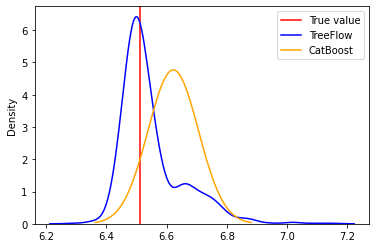

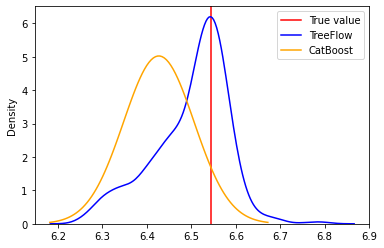

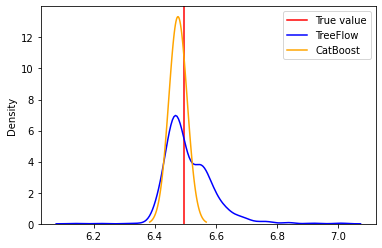

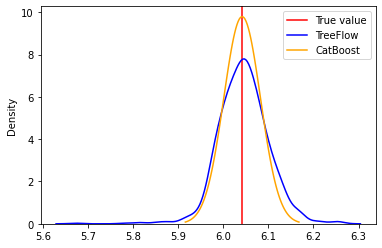

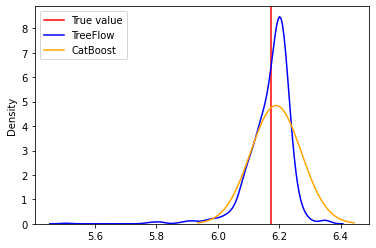

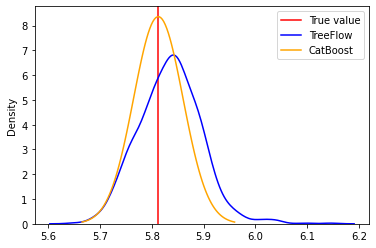

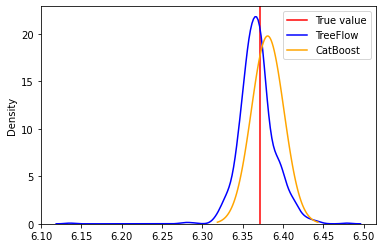

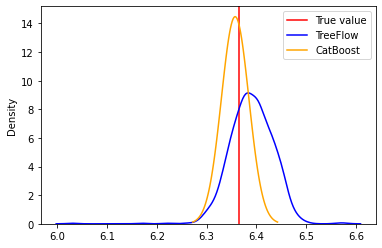

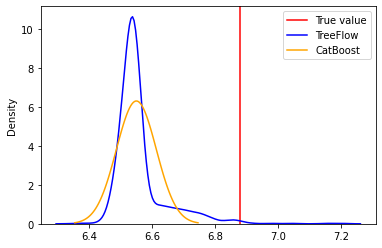

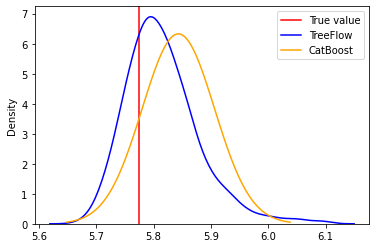

In [19]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()